In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("C:/Users/Uma/Desktop/intern/Titanic-Dataset.csv")

In [11]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [12]:
# some basic operations on above dataset
df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
# let's check the size of dataset
df.size


10692

In [16]:
# let's check the shape of dataset
df.shape

(891, 12)

# Checking and Handeling Null values

In [22]:
#Let's check if the dataset has any null values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# let's handle the null values in Age column
# filling the null values with the mean (average) of values in Age column 
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [26]:
# let's handle the null values in Cabin column
# filling the null values with the value of next non-null value in column
df['Cabin'] = df['Cabin'].ffill()

In [28]:
# let's handle the null values in Embarked column
# 
df['Embarked'] = df['Embarked'].bfill()

In [30]:
df.dropna(inplace = True)

In [33]:
# Again cehck the null values 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Prediction

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['Sex'].value_counts()

Sex
male      576
female    314
Name: count, dtype: int64

In [45]:
df['Sex'] = le.fit_transform(df["Sex"])


In [47]:
# Let's separate input and output columns for prediction
x = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [49]:
# lets check the value counts in y [0:Dead,1:Survived]
y.value_counts()

Survived
0    548
1    342
Name: count, dtype: int64

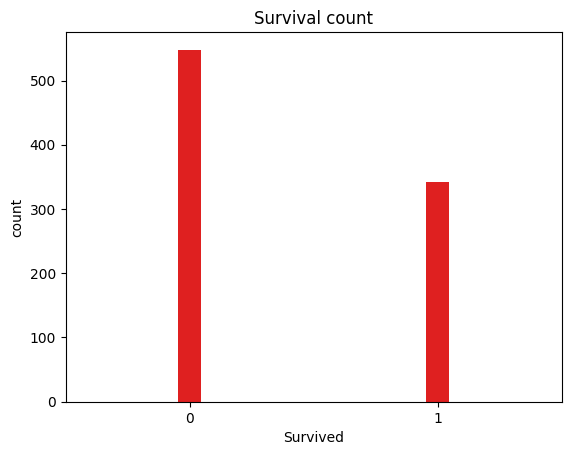

In [57]:
plt.title('Survival count')
sns.countplot(x = y,width = 0.09,color = "red");

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [61]:
y_pred = dt.predict(x)
df1 = pd.DataFrame({"Survived":y,"Survivied Prediction":y_pred})
df1.head(40)

,Survived,Survivied Prediction
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1
10,1,1


# let's visualize the survivel count


#Model Evaluation
 

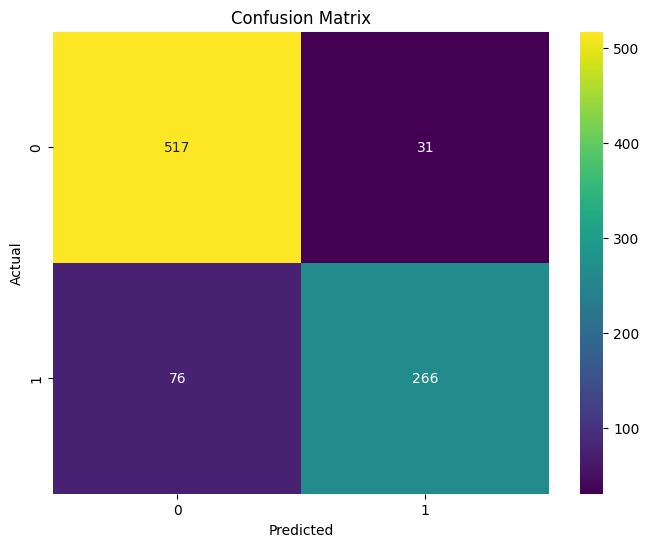

In [63]:
# confusion matrix
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       548
           1       0.90      0.78      0.83       342

    accuracy                           0.88       890
   macro avg       0.88      0.86      0.87       890
weighted avg       0.88      0.88      0.88       890



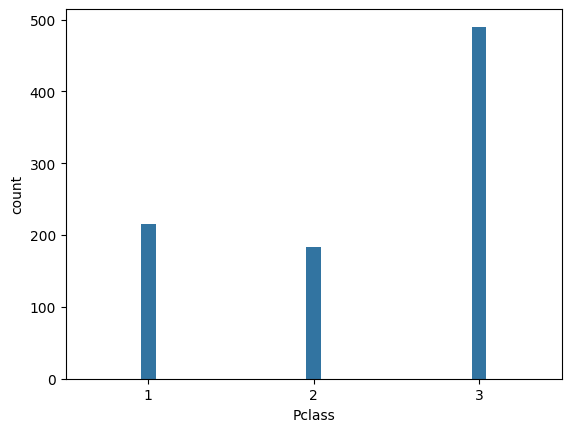

In [67]:
# let's Visualize the Pclass column
sns.countplot(x = df['Pclass'],width= 0.09);

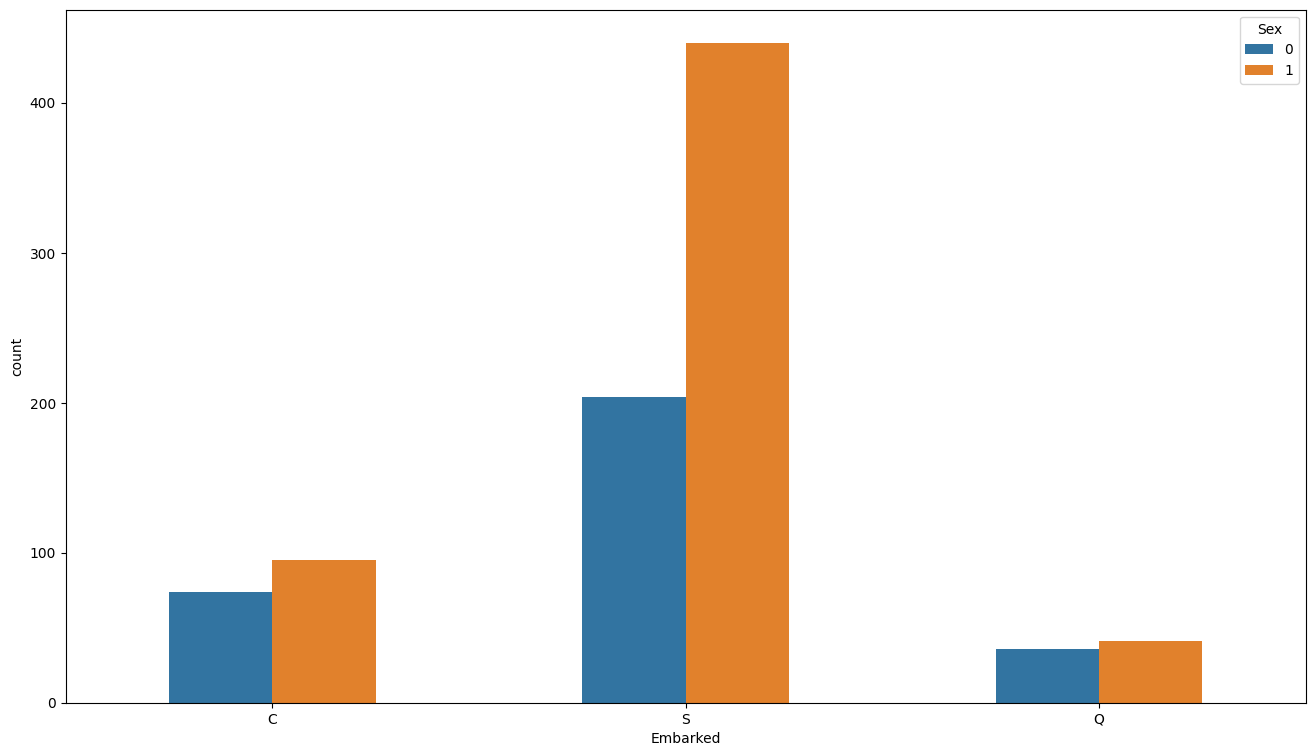

In [69]:
# let's visualize the Emberked column based on Gender
plt.figure(figsize =(16,9))
sns.countplot(df,x = "Embarked",width = 0.5,hue = "Sex");

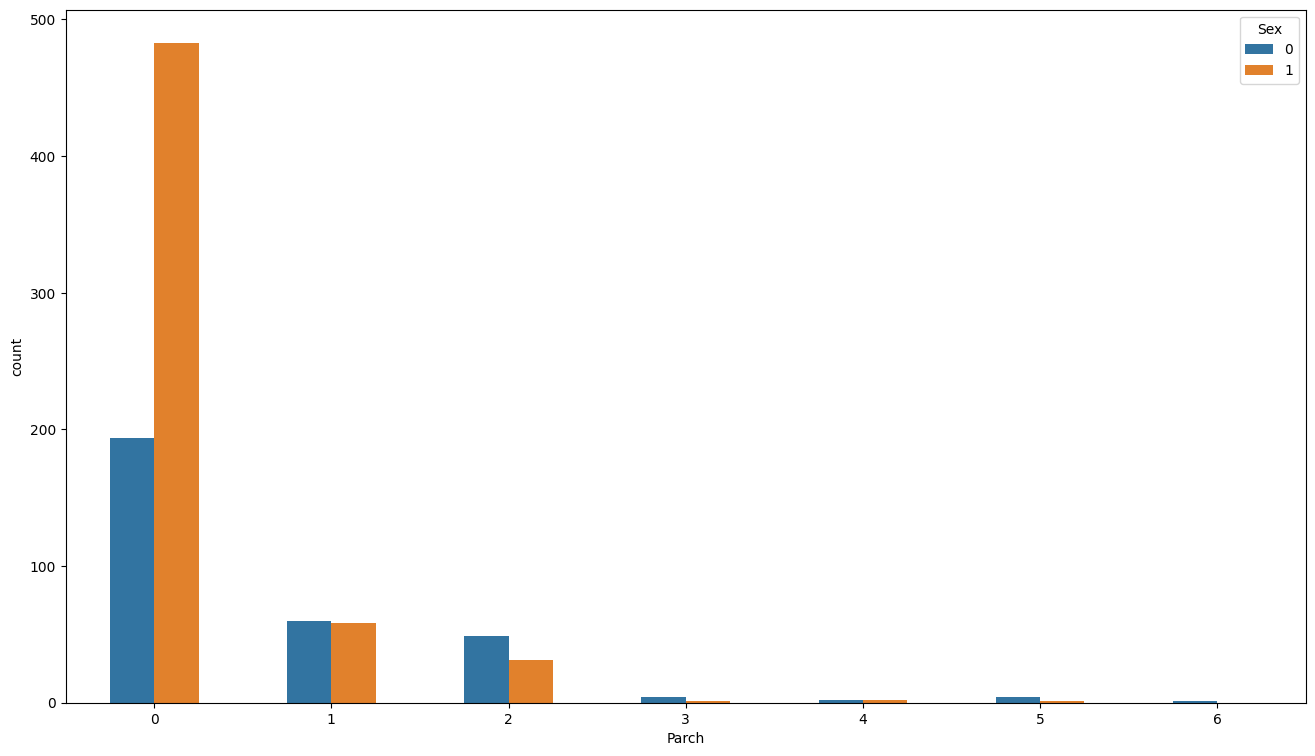

In [71]:
# let's visualize the Pclass column based on Gender column
plt.figure(figsize =(16,9))
sns.countplot(df,x = "Parch",width = 0.5,hue = "Sex");

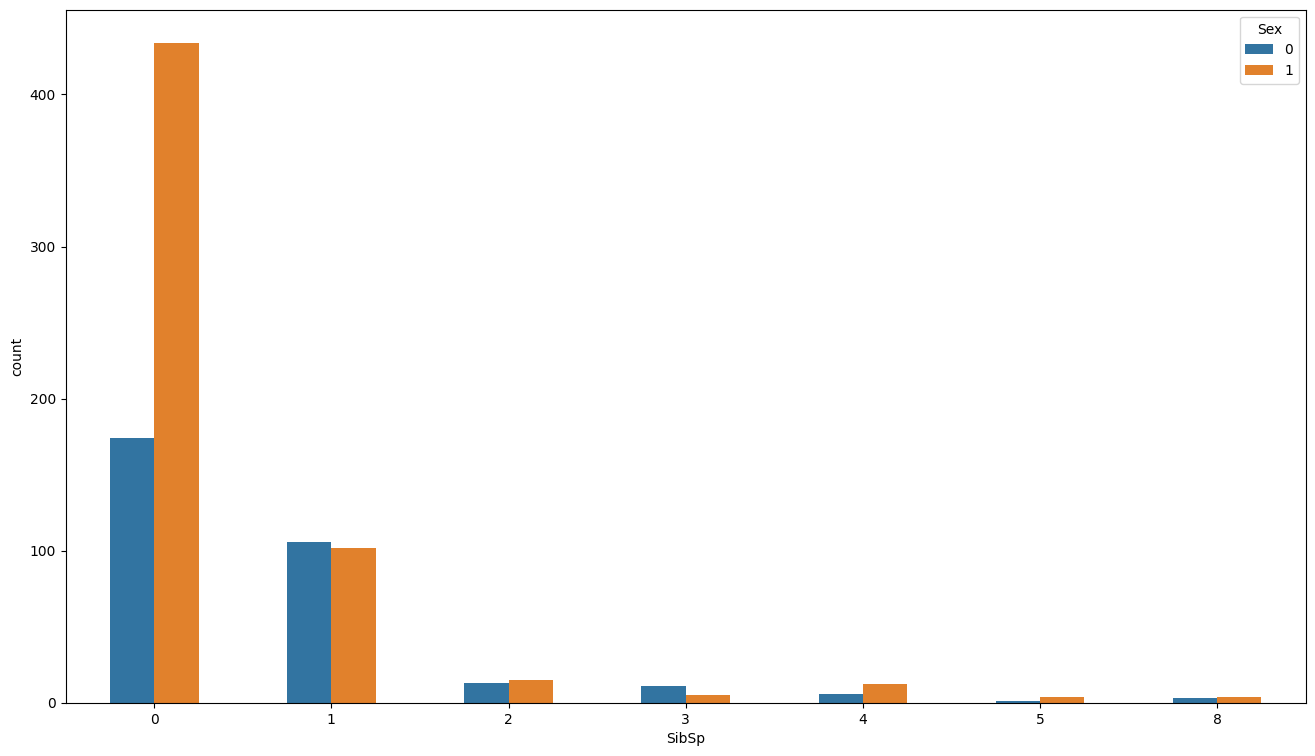

In [73]:
# let's visualize the SibSp column based on Gender column
plt.figure(figsize =(16,9))
sns.countplot(df,x = "SibSp",width = 0.5,hue = "Sex");

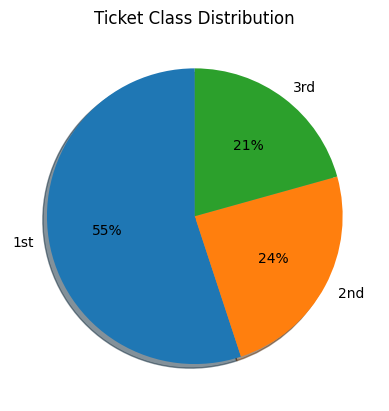

In [75]:
# let's visualize the Pclass column using Pie-Chart 
a,b,c = df['Pclass'].value_counts()
x = [a,b,c]
l =  ['1st','2nd','3rd']
plt.title('Ticket Class Distribution')
plt.pie(x,labels =l,autopct = "%.f%%",labeldistance = 1.1,shadow = True,startangle = 90);

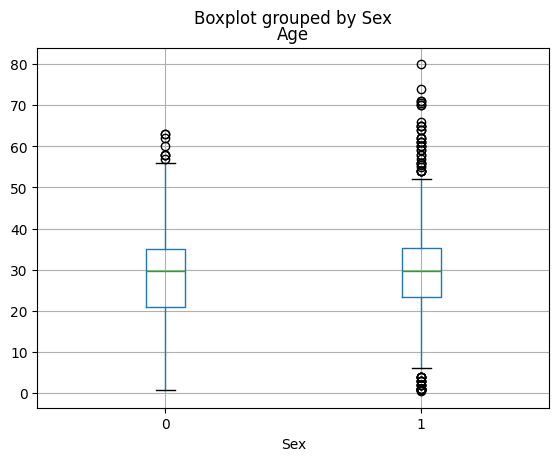

In [77]:
df.boxplot(column='Age', by='Sex');

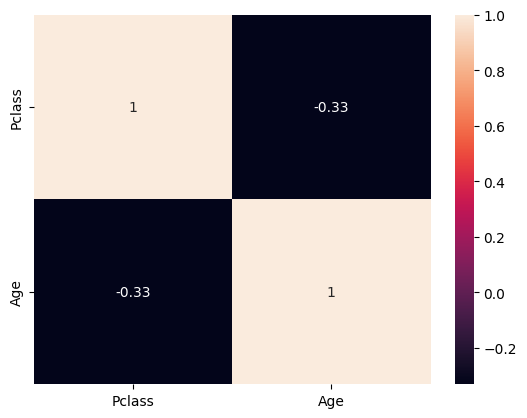

In [80]:
sns.heatmap(df[['Pclass', 'Age']].corr(), annot=True);


<Axes: xlabel='Age', ylabel='Count'>

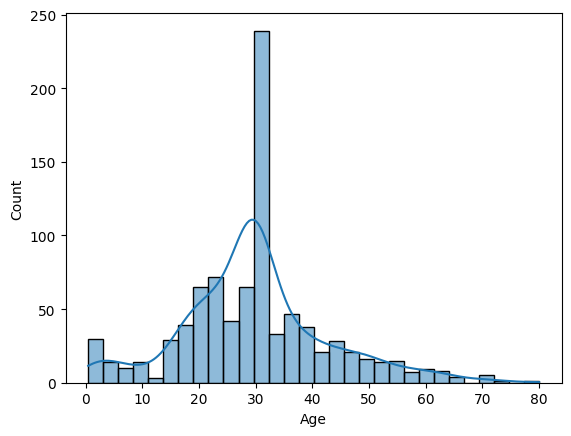

In [82]:
sns.histplot(df['Age'], kde=True)

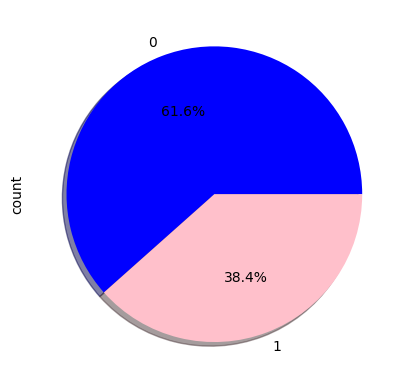

In [84]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'],shadow = True);

<Axes: xlabel='Age', ylabel='Count'>

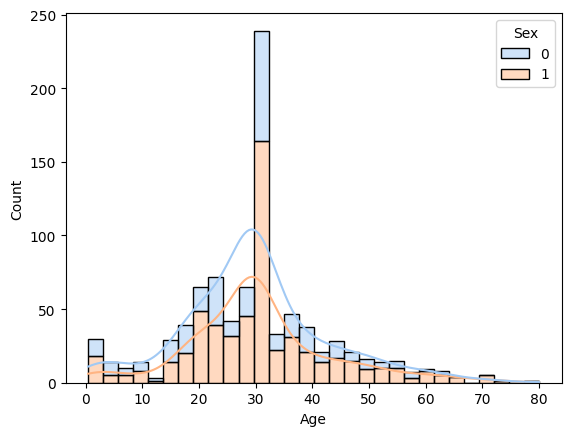

In [89]:
sns.histplot(df, x='Age', hue='Sex', multiple='stack', palette='pastel', kde=True)


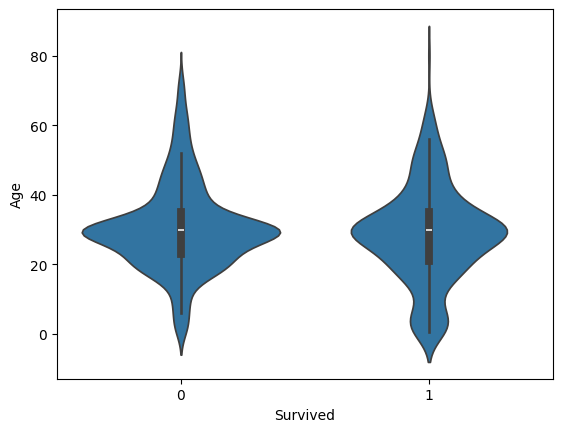

In [91]:
sns.violinplot(x='Survived', y='Age', data=df);


# This is the end of first project